In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline

warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message="^internal gelsd"
)

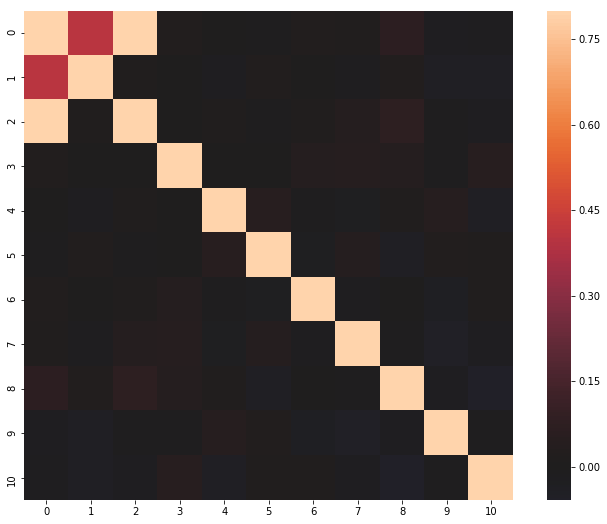

In [5]:
n = 1000

p = 10

X = np.random.normal(size=n*p).reshape((n, p))

y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n*1) +5

f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

sns.heatmap(corrmat, vmax=.8, square=True, center=0)
plt.show()

R-sq:  0.8307820920036346
R-sq:  0.8307820020075816


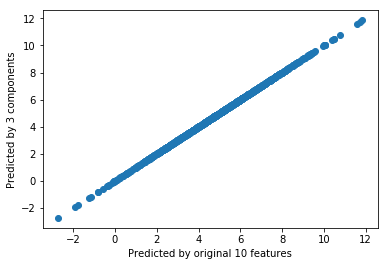

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-sq: ', regr.score(X, y))

pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)

Y_PLS_pred = pls1.predict(X)
print('R-sq: ', pls1.score(X, y))

plt.scatter(Y_pred, Y_PLS_pred)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 components')
plt.show()


In [7]:
pls2 = PLSRegression(n_components=1)
pls2.fit(X, y)
Y_PLS2_pred = pls2.predict(X)

pls3 = PLSRegression(n_components=2)
pls3.fit(X, y)
Y_PLS3_pred = pls3.predict(X)

pls4 = PLSRegression(n_components=5)
pls4.fit(X, y)
Y_PLS4_pred = pls4.predict(X)


print('R-sq original: ', regr.score(X, y))
print('R-sq 1 comp: ', pls2.score(X, y))
print('R-sq 2 comp: ', pls3.score(X, y))
print('R-sq 3 comp: ', pls1.score(X, y))
print('R-sq 5 comp: ', pls4.score(X, y))

R-sq original:  0.8307820920036346
R-sq 1 comp:  0.8240205994914248
R-sq 2 comp:  0.8307553846550101
R-sq 3 comp:  0.8307820020075816
R-sq 5 comp:  0.8307820920008359


Even one component gives basically the same results.

## Change data

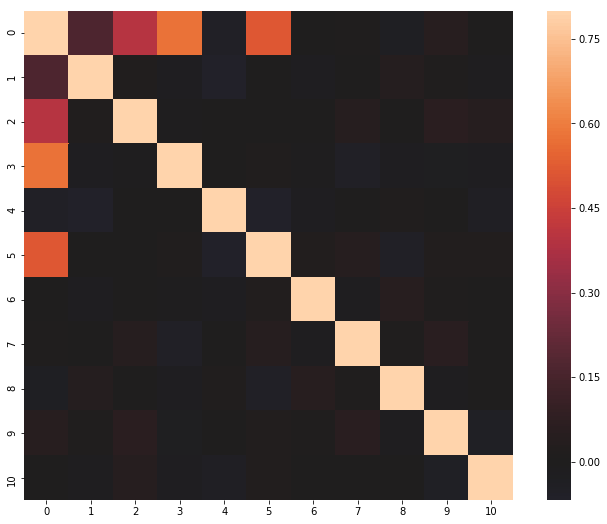

In [10]:
n = 1000

p = 10

X = np.random.normal(size=n*p).reshape((n, p))

y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n*1) +5 + X[:, 2]*(3 +X[:, 3]) + X[:, 4]**3

f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

sns.heatmap(corrmat, vmax=.8, square=True, center=0)
plt.show()

R-sq:  0.7794888517935347
R-sq:  0.7794887628267629


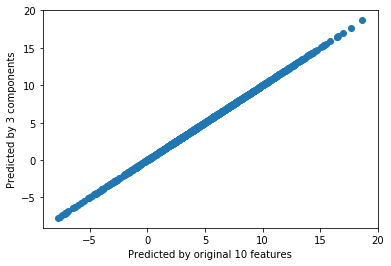

In [11]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-sq: ', regr.score(X, y))

pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)

Y_PLS_pred = pls1.predict(X)
print('R-sq: ', pls1.score(X, y))

plt.scatter(Y_pred, Y_PLS_pred)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 components')
plt.show()



In [12]:
pls2 = PLSRegression(n_components=1)
pls2.fit(X, y)
Y_PLS2_pred = pls2.predict(X)

pls3 = PLSRegression(n_components=2)
pls3.fit(X, y)
Y_PLS3_pred = pls3.predict(X)

pls4 = PLSRegression(n_components=5)
pls4.fit(X, y)
Y_PLS4_pred = pls4.predict(X)


print('R-sq original: ', regr.score(X, y))
print('R-sq 1 comp: ', pls2.score(X, y))
print('R-sq 2 comp: ', pls3.score(X, y))
print('R-sq 3 comp: ', pls1.score(X, y))
print('R-sq 5 comp: ', pls4.score(X, y))

R-sq original:  0.7794888517935347
R-sq 1 comp:  0.7759967399201171
R-sq 2 comp:  0.7794696342445184
R-sq 3 comp:  0.7794887628267629
R-sq 5 comp:  0.7794888517919969


Still only need one component.

## Change data again

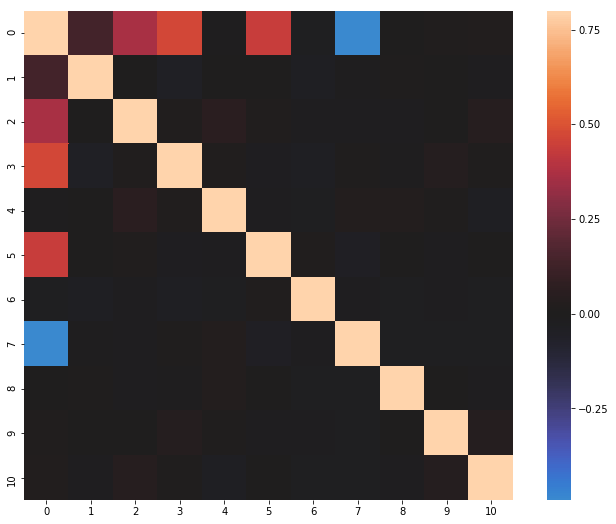

In [14]:
n = 1000

p = 10

X = np.random.normal(size=n*p).reshape((n, p))

y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n*1) +5 + X[:, 2]*(3 +X[:, 3]) + X[:, 4]**3 - (np.random.poisson(lam=3, size=n*1)*X[:, 6])

f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

sns.heatmap(corrmat, vmax=.8, square=True, center=0)
plt.show()

R-sq:  0.7936004556981728
R-sq:  0.7936004364341749


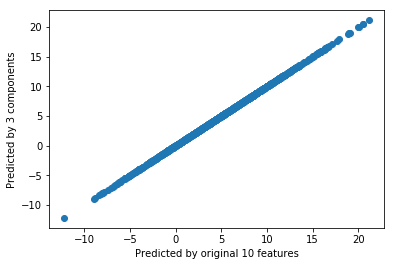

In [15]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-sq: ', regr.score(X, y))

pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)

Y_PLS_pred = pls1.predict(X)
print('R-sq: ', pls1.score(X, y))

plt.scatter(Y_pred, Y_PLS_pred)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 components')
plt.show()




In [16]:
pls2 = PLSRegression(n_components=1)
pls2.fit(X, y)
Y_PLS2_pred = pls2.predict(X)

pls3 = PLSRegression(n_components=2)
pls3.fit(X, y)
Y_PLS3_pred = pls3.predict(X)

pls4 = PLSRegression(n_components=5)
pls4.fit(X, y)
Y_PLS4_pred = pls4.predict(X)


print('R-sq original: ', regr.score(X, y))
print('R-sq 1 comp: ', pls2.score(X, y))
print('R-sq 2 comp: ', pls3.score(X, y))
print('R-sq 3 comp: ', pls1.score(X, y))
print('R-sq 5 comp: ', pls4.score(X, y))

R-sq original:  0.7936004556981728
R-sq 1 comp:  0.7909864024353811
R-sq 2 comp:  0.7935961273093077
R-sq 3 comp:  0.7936004364341749
R-sq 5 comp:  0.7936004556979881


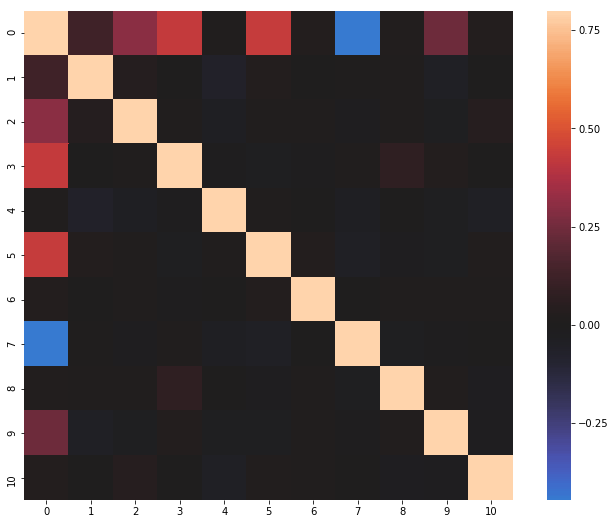

In [20]:
n = 1000

p = 10

X = np.random.normal(size=n*p).reshape((n, p))

y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n*1) +5 + X[:, 2]*(3 +X[:, 3]) + X[:, 4]**3 - (np.random.poisson(lam=3, size=n*1)*X[:, 6]) + np.cos(X[:, 7])*2 + np.exp(X[:, 8])

f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

sns.heatmap(corrmat, vmax=.8, square=True, center=0)
plt.show()

R-sq:  0.7240001824088922
R-sq:  0.7240001281461075


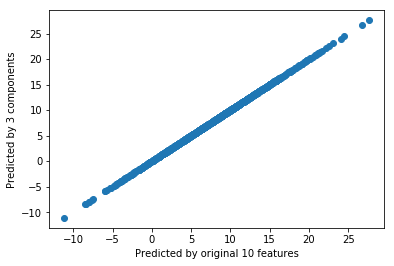

In [21]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-sq: ', regr.score(X, y))

pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)

Y_PLS_pred = pls1.predict(X)
print('R-sq: ', pls1.score(X, y))

plt.scatter(Y_pred, Y_PLS_pred)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 components')
plt.show()


In [22]:
pls2 = PLSRegression(n_components=1)
pls2.fit(X, y)
Y_PLS2_pred = pls2.predict(X)

pls3 = PLSRegression(n_components=2)
pls3.fit(X, y)
Y_PLS3_pred = pls3.predict(X)

pls4 = PLSRegression(n_components=5)
pls4.fit(X, y)
Y_PLS4_pred = pls4.predict(X)


print('R-sq original: ', regr.score(X, y))
print('R-sq 1 comp: ', pls2.score(X, y))
print('R-sq 2 comp: ', pls3.score(X, y))
print('R-sq 3 comp: ', pls1.score(X, y))
print('R-sq 5 comp: ', pls4.score(X, y))

R-sq original:  0.7240001824088922
R-sq 1 comp:  0.7200999388492727
R-sq 2 comp:  0.7239911177929349
R-sq 3 comp:  0.7240001281461075
R-sq 5 comp:  0.7240001824087322
